In [2]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from os import listdir
from os.path import join, isfile
from PIL import Image
from imutils.contours import sort_contours
import imutils

In [52]:
image = cv2.imread('/content/39.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,(300,300))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars=[]
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        chars.append(roi)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

error: ignored

In [63]:

image = cv2.imread('/content/39.jpg', cv2.IMREAD_GRAYSCALE)
thrsh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]
cv2.imwrite('./3.png', thrsh) 

True

In [68]:
img = Image.open('./3.png')
img.size

(1280, 600)

In [69]:
img = img.resize((28, 28), Image.ANTIALIAS)
img.save('./3333333333.png')

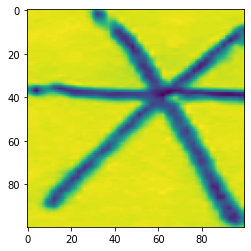

In [51]:
chars[1] = cv2.resize(chars[1], (100, 100))
plt.imshow(chars[1])